# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Webscraping Project 4 Lab

Week 4 | Day 4

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com (or other sites at your team's discretion). In the second part, the focus is on using listings with salary information to build a model and predict high or low salaries and what features are predictive of that result.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

In [230]:
URL = "http://www.indeed.com/jobs?q=data+scientist&l=New+York&start=20"
#URL = "http://www.indeed.com/viewjob?cmp=StreetID&t=Quantitative+Analyst&jk=7310f6c4a3e64d86&q=data+scientist+%2420%2C000"
#URL = "http://www.indeed.com/cmp/The-Real-Deal/jobs/Research-Analyst-f7ca8bb533116aa5?sjdu=Zzi_VW2ygsY1fzh3Ma9ZsPaqOkFrOZiF9heaw3NaNTj0OQvZGGtRbaXwwfcz5j-Cmo2b5pswEqp4hwhkngvpEg"
#URL = "http://www.indeed.com/viewjob?cmp=DTS&t=Senior+Machine+Learning+Data+Engineer&jk=52f498ef4a67d884&q=data+scientist+%2420%2C000"


In [46]:
import requests
import bs4
from bs4 import BeautifulSoup

In [232]:
## YOUR CODE HERE
import requests
import bs4
from bs4 import BeautifulSoup
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium import webdriver

dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = (
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36"
)

driver = webdriver.PhantomJS(executable_path='/Applications/anaconda/anaconda/bin/phantomJS', desired_capabilities=dcap)
driver.set_window_size(1024, 768) 

URL = "http://www.indeed.com/jobs?q=data+scientist&l=New+York&start=20"

driver.get(URL)
page_html = driver.page_source
soup = BeautifulSoup(page_html, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <!-- pll -->
  <script async="" src="http://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript">
  </script>
  <script async="" src="http://b.scorecardresearch.com/beacon.js">
  </script>
  <script async="" src="https://connect.facebook.net/en_US/fbevents.js">
  </script>
  <script async="" src="//www.google-analytics.com/analytics.js">
  </script>
  <script src="/s/af4f8a6/en_US.js" type="text/javascript">
  </script>
  <link href="/s/6aa5893/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+scientist&amp;l=New+York" rel="alternate" title="Data Scientist Jobs, Employment in New York, NY" type="application/rss+xml"/>
  <link href="/m/jobs?q=data+scientist&amp;l=New+York" media="handheld" rel="alternate"/>
  <script type="text/javascript">
   window['closureReadyCallbacks'] = [];

    function call_when_jsal

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above
- Include any other features you may want to use later (e.g. summary, #of reviews...)

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Indeed.com only has salary information for an estimated 20% of job postings. You may want to add other cities to the list below to gather more data. 
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [415]:
################################################################
############### EDIT THESE CONSTANTS
############### 
###############        EDIT THESE CONSTANTS

MAX_RESULTS_PER_CITY = 1000      ### DO NOT SET MORE THAN 1000
URL_SEARCH_TERM = 'Data Scientist' ### DO NOT SET MORE THAN SINGLE SEARCH TERM (TITLE)
CITY_SET = ['New York', 'Chicago', 'San Francisco', 'Austin', 'Atlanta', '', 'Boston', 'Seattle'\
            'Los Angeles','Washington, DC', 'San Jose','Denver', 'Atlanta','Houston',\
            'Dallas','Nashville','San Diego','Cleveland','Minneapolis','Baltimore','Philadelphia','Detroit']
###############
################################################################


import requests
import bs4
import pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium import webdriver
import datetime
import urllib

def extract_location_from_resultRow(result):
    try:
        location = (result.find(class_='location').text.strip())
    except:
        location = ''
    return location

def extract_company_from_resultRow(result):
    try:
        company = (result.find(class_='company').text.strip())
    except:
        company = ''
    return company

def extract_jkid_from_resultRow(result):
    try:
        row = (result.find(class_='jobtitle turnstileLink'))
        jkid = result['data-jk']
    except: 
        jkid = ''
    return jkid

def extract_title_from_resultRow(result):
    try:
        title = (result.find(class_='turnstileLink'))
        title_text = title.text
    except: 
        title_text = ''
    return title_text

def extract_salary_from_resultRow(result):
    try:
        salary = (result.find(class_='snip').find('nobr').text)
    except:
        salary = ''
    salary_text = salary
    return salary_text

def extract_reviews_from_resultRow(result):
    try:
        reviews = (result.find(class_='slNoUnderline').text.strip().strip(' reviews').replace(',',''))
    except: 
        reviews = ''
    return reviews

def extract_stars_from_resultRow(result):
    try: 
        stars = (result.find(class_='rating')['style']).split(';background-position:')[1].split(':')[1].split('px')[0].strip()
    except: 
        stars = ''
    return stars

def extract_date_from_resultRow(result):
    try: 
        date = (result.find(class_='date').text.strip(' ago').strip())
    except: 
        date = ''
    return date

def extract_summary_from_resultRow(result):
    try: 
        summary = (result.find("span", {"itemprop" : "description"}).text.strip())
    except: 
        summary = ''
    return summary

dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36")

driver = webdriver.PhantomJS(executable_path='/Applications/anaconda/anaconda/bin/phantomJS', desired_capabilities=dcap)
driver.set_window_size(1024, 768) 

for city in CITY_SET:
    job_dict = []
    now = datetime.datetime.now()
    for start in range(0, MAX_RESULTS_PER_CITY, 10):

        URL = "http://www.indeed.com/jobs?q="+urllib.quote(URL_SEARCH_TERM)+"&l="+urllib.quote(city)+"&start="+str(start)
        driver.get(URL)
        soup = BeautifulSoup(driver.page_source, "lxml")

        for i in soup.findAll("div", {"data-tn-component" : "organicJob"}):

            location = extract_location_from_resultRow(i)
            company = extract_company_from_resultRow(i)
            summary = extract_summary_from_resultRow(i)
            jkid = extract_jkid_from_resultRow(i)
            title = extract_title_from_resultRow(i)
            salary = extract_salary_from_resultRow(i)
            reviews = extract_reviews_from_resultRow(i)
            stars = extract_stars_from_resultRow(i)
            post_date = extract_date_from_resultRow(i)

            job_dict.append([location, company, summary, jkid, title, salary, stars, reviews, post_date, now])
            
        job_df = pd.DataFrame(job_dict, columns=['location', 'company', 'summary', 'jkid', 'title', 'salary', 'stars', 'reviews', 'post_date', 'pull_date'])       

    job_df.to_csv('scrape'+city+'_'+str(MAX_RESULTS_PER_CITY)+'.csv', encoding='utf-8')
        

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [1]:
import numpy as np
import pandas as pd
from selenium import webdriver
import datetime
import urllib
import urllib2
import re
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from bs4 import BeautifulSoup
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

In [2]:
#load in the master csv file
master_df = pd.read_csv('master.csv')

# DELETE ANY HEADER ROWS LEFT OVER FROM CSV MERGE
try: master_df = master_df[master_df['reviews'] != 'reviews'] 
except: pass

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/ops.py:716: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


In [3]:
# Deleting unnamed column
del master_df['Unnamed: 0']

In [4]:
###### REVIEWS CLEAN TO FLOAT
######

master_df['reviews'] = master_df['reviews'].fillna(0)

def indeed_review_cleanup(review): 
    try:
        review = review.str.replace(',','')
        review = review.strip(' reviews')
        review = review.strip(' review')
        review = review.strip('reviews')
        review = review.strip()
        review = float(review)
    except:
        #print review
        pass
    return review

master_df['clean_review'] = master_df[['reviews']].applymap(lambda x:indeed_review_cleanup(x))

master_df['clean_review'].sort_values().unique()

master_df['clean_review'] = master_df['clean_review'].astype(float)
master_df['reviews'] = master_df['clean_review']
master_df.drop('clean_review', axis=1, inplace=True)

#########  END CLEAN REVIEWS
###################

In [5]:
###### POST_DATE CLEAN TO FLOAT
######

try:
    master_df['clean_post_date'] = master_df['post_date']
except: pass


def post_date_to_day_float(dateValue):
    try:
        temp = dateValue
        dateValue.replace('s','')
        if 'day' in dateValue:
            temp = dateValue.split()[0]
        elif 'hour' in dateValue:
            temp = dateValue.split()[0]
            temp = float(temp)/24
        elif 'minute' in dateValue:
            temp = dateValue.split()[0]
            temp = float(temp)/24/60
        if '+' in dateValue:
            temp = 45           
    except: 
        pass
    return temp

master_df['clean_post_date'] = master_df[['clean_post_date']].applymap(lambda x: post_date_to_day_float(x))

master_df['clean_post_date'].sort_values().unique()

master_df['clean_post_date'] = master_df['clean_post_date'].astype(float)
master_df['post_date'] = master_df['clean_post_date']
master_df.drop('clean_post_date', axis=1, inplace=True)
master_df.rename(columns = {'post_date':'post_date_daysAgo'}, inplace=True)

#########  END CLEAN POST_DATE
###################

In [6]:
###### STARS CLEAN TO FLOAT
######


master_df['clean_stars'] = master_df['stars'].fillna(0)
master_df['clean_stars'] = master_df[['stars']].astype(float).applymap(lambda x: x//6/2)


master_df['stars'] = master_df['clean_stars']
master_df.drop('clean_stars', axis=1, inplace=True)


#########  END CLEAN STARS
###################

In [7]:
#####Create JOB_LINK column from JKID
#####

master_df['job_link'] = master_df[['jkid']].applymap(lambda x: 'http://www.indeed.com/rc/clk?jk='+x)

#########  END JOB_LINK COLUMN
###################

In [8]:
##### Location Cleanup
#####

def location_cleanup(location):
    temp = location
    temp_city = location.split(',')[0]
    try:
        temp_state = location.split(',')[1].split()[0]
    except: 
        temp_state = ''
    return temp_city+", "+temp_state
    
master_df['location_clean'] = master_df[['location']].applymap(lambda x: location_cleanup(x))
master_df['location_clean'].sort_values().unique()

master_df['location'] = master_df['location_clean']
master_df.drop('location_clean', axis=1, inplace=True)

#########  END LOCATION CLEANUP COLUMN
###################

In [9]:
##### Salary Cleanup
#####

master_df['salary'] = master_df['salary'].fillna(0)

def cleanup_salary(salary):
    if "year" in str(salary):
        temp = salary.strip(" a year")
        temp = temp.split('-')
        low_range = int(temp[0].strip().replace("$","").replace(",",""))
        high_range = int(temp[-1].strip().replace("$","").replace(",",""))
        avg = (low_range + high_range) / 2
        salary_list = [low_range,high_range,avg]
    elif "month" in str(salary):
        temp = salary.replace("a month","")
        temp = temp.split('-')
        low_range = int(temp[0].replace("$","").replace(",",""))*12
        high_range = int(temp[-1].replace("$","").replace(",",""))*12
        avg = (low_range + high_range) / 2
        salary_list = [low_range,high_range,avg]
    elif "hour" in str(salary):
        temp = salary.replace("an hour","")
        temp = temp.split('-')
        low_range = float(temp[0].replace("$","").replace(",",""))*2080
        high_range = float(temp[-1].replace("$","").replace(",",""))*2080
        avg = (low_range + high_range) / 2
        salary_list = [low_range,high_range,avg]
    else:
        salary_list = [0,0,0]
        low_range = 0
        high_range = 0
        avg = 0
        
    return low_range, high_range, avg
master_df['salary_clean'] = master_df[['salary']].applymap(lambda x: cleanup_salary(x))

master_df['salary'] = master_df['salary_clean']

master_df['sal_low'] = master_df['salary'].apply(lambda x: x[0])
master_df['sal_high'] = master_df['salary'].apply(lambda x: x[1])
master_df['sal_avg'] = master_df['salary'].apply(lambda x: x[2])

master_df.drop('salary_clean', axis=1, inplace=True)
master_df.drop('salary', axis=1, inplace=True)



#########  END SALARY CLEANUP COLUMN
###################
#Add Comment
# master_df['salary_clean'] = master_df[['salary']].applymap(lambda x: cleanup_salary(x))

# master_df['salary'] = master_df['salary_clean']
# master_df.drop('salary_clean', axis=1, inplace=True)

#########  END SALARY CLEANUP COLUMN
###################

In [10]:
# has_salary = master_df[master_df['salary'] != (0,0,0)].shape[0]
# all_records = master_df.shape[0]
# print "Job listings with salary info:", has_salary
# print "Total job listings: ", all_records
# print "Salaried listings / Total listings", round((float(has_salary) / all_records) * 100, 3), '%'
# master_df.head(5)
# master_df['title'].sort_values().unique()

# stacked = pd.DataFrame(master_df['summary'].str.split().tolist()).stack()
# final = pd.DataFrame(stacked.value_counts())
# final.reset_index(inplace=True)
# final['unique'] = final['index'].sort_values().unique()
# final['unique']
# import nltk
# final['tagged'] = final[['index']].applymap(lambda x: nltk.pos_tag(x.strip()))
# final.info()
# master_df.shape

In [164]:
#changing title, search_city, and company to lower case
master_df['title'] = master_df['title'].apply(lambda x: str(x).lower())
master_df['search_city'] = master_df['search_city'].apply(lambda x: str(x).lower())
master_df['company'] = master_df['company'].apply(lambda x: str(x).lower())
master_df['search_city'] = master_df['search_city'].apply(lambda x: x.replace('washington, dc','washington dc'))

In [12]:
#Bin the indeed df (master_df) into entry/mid/senior bins
senior = ['sr','senior','lead','instructor','principal', 'director','manager','consultant','chief']
mid = ['data','scientist','analyst','analytics','statistician',"statistical",'machine learning']
entry = ['associate','Associate','intern','junior','-1']
senior_bin = []
mid_bin = []
entry_bin = []
other_bin = []
for x in master_df['title']:
    if any(word in x.lower() for word in senior):
        senior_bin.append(1)
        mid_bin.append(0)
        entry_bin.append(0)
        other_bin.append(0)
    elif any(word in x.lower() for word in entry):
        senior_bin.append(0)
        mid_bin.append(0)
        entry_bin.append(1)
        other_bin.append(0)        
    elif any(word in x.lower() for word in mid):
        senior_bin.append(0)
        mid_bin.append(1)
        entry_bin.append(0)
        other_bin.append(0)        
    else:
        senior_bin.append(0)
        mid_bin.append(0)
        entry_bin.append(0)
        other_bin.append(1)        
master_df['senior_bin'] = pd.Series(senior_bin)
master_df['mid_bin'] = pd.Series(mid_bin)
master_df['entry_bin'] = pd.Series(entry_bin)
master_df['other_bin'] = pd.Series(other_bin)

#### Scraping from www.expatistan.com to get Cost of Living index

In [13]:
#scraping to get cost of living index
URL = 'https://www.expatistan.com/cost-of-living/country/united-states' 
driver = webdriver.PhantomJS(executable_path='/Users/amishdalal/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(1024, 768) 
driver.get(URL)
soup = BeautifulSoup(driver.page_source,'lxml')
#print soup.prettify()

In [168]:
#scraping to get cost of living index - converting to dataframe
c = []
r = []
for city in soup.findAll('table',class_="city-index extra-spacing-in-mobile"):
    for cities in soup.findAll('td',class_='city-name'):
        c.append(cities.text)
    for rank in soup.findAll('td',class_='price-index'):
        r.append(rank.text)

#forming the data frame
COL = pd.DataFrame([c, r]).T
#doing the cleaning to get ready for merge with glassdoor
COL = COL.rename(columns = {0:'Cities',1:'price_index'})
COL['Cities'] = COL['Cities'].apply(lambda x: str(x).split(',')).apply(lambda x: x[0]).apply(lambda x: str(x).replace(' (United States)',''))
COL['price_index'] = COL['price_index'].astype(int)
#creating a new column to have the ratio as NYC as the base
new_base  = COL.loc[1,'price_index']
COL['COL_new'] = COL['price_index'].apply(lambda x: float(new_base)/x)
#clean the city
COL.loc[21,'Cities'] = 'Minneapolis'
COL.loc[4,'Cities'] = 'Washington DC'
COL.loc[1,'Cities'] = 'New York'
COL.ix[70,'Cities'] = 'Cincinatti'
#converting cities column to lower
COL['Cities'] = COL['Cities'].apply(lambda x: str(x).lower())

master_df = pd.merge(master_df,COL.iloc[:,[0,-1]], left_on='search_city',right_on='Cities',how='left')
del master_df['Cities']


In [170]:
#limited the master_df (indeed) to only consider data scientist and data to be used as a test for our predictor
master_df = master_df.ix[master_df['title'].str.contains('data scientist','data'),:]

### Importing Glassdoor scraping data

The scraping code was forked from https://github.com/ashalan/glassdoor-salary-scraper. This will allow us to scrape glassdoor which outputs to JSON files.

In [16]:
#bringing in glassdoor data by a for loop and creating a dataframe
cities = ['atlanta','austin','boston','dallas','detroit','houston','kansas-city-mo','los-angeles',\
         'minneapolis','nashville','new-york-city','san-francisco','san-jose','seattle','washington-dc']
glassdoor = pd.DataFrame(columns = ['company','jobTitle','meanPay','City'])
for city in cities:
    path= "./glassdoor-salary-scraper-master/"+city+".json"
    city_sub = pd.read_json(path)
    city_sub['City'] = city
    glassdoor = pd.concat([glassdoor,city_sub])
glassdoor.reset_index(inplace = True,drop=True)

#cleaning the columns for City
glassdoor['City'] = glassdoor['City'].apply(lambda x: str(x).replace('-',' '))

#cleaning and converting into string into a column for low sal, high sal, and average sal
glassdoor['meanPay'] = glassdoor['meanPay'].apply(lambda x: str(x).replace('k','000')).apply(lambda x: str(x).replace('$',''))
glassdoor['meanPay'] = glassdoor['meanPay'].apply(lambda x: str(x).replace(',',''))
glassdoor['low_sal'] = glassdoor['meanPay'].apply(lambda x: str(x).split(' - ')).apply(lambda x: x[0]).astype(float)
glassdoor['high_sal'] = glassdoor['meanPay'].apply(lambda x: str(x).split(' - ')).apply(lambda x: x[-1]).astype(float)

#converting the hourly wages

hourly_list = glassdoor[glassdoor['low_sal'] < 1000].index.tolist()
hourly_list
for x in hourly_list:
    glassdoor.loc[x,'low_sal'] = glassdoor.get_value(x,'low_sal')*2080
    glassdoor.loc[x,'high_sal'] = glassdoor.get_value(x,'high_sal')*2080
#converting the monthly wages

    monthly_list = glassdoor[glassdoor['low_sal'] < 10000].index.tolist()
for x in monthly_list:
    glassdoor.loc[x,'low_sal'] = glassdoor.get_value(x,'low_sal')*12
    glassdoor.loc[x,'high_sal'] = glassdoor.get_value(x,'high_sal')*12

#converting salary into integers    
glassdoor['low_sal'] = glassdoor['low_sal'].astype(int)
glassdoor['high_sal'] = glassdoor['high_sal'].astype(int)

#finding median salary

sal_avg = []
for x,y in zip(glassdoor['low_sal'],glassdoor['high_sal']):
    if y > x:
        sal_avg.append(x + (y-x)/2)
    else:
        sal_avg.append(y)
glassdoor['sal_avg'] = sal_avg

#glassdoor['company'] = glassdoor['company'].apply(lambda x: str(x).upper())

#changing company from upper to lower case

company = []
for x in glassdoor['company']:
    if type(x) == 'unicode':
        company.append(x)
    else:
        company.append(x.encode('ascii','replace'))
company_lower = []
for x in company:
    company_lower.append(x.lower())
glassdoor['company'] = company_lower
glassdoor = glassdoor.rename(columns = {'jobTitle':'title'})

#creating title bins for senior, mid, and entry level

senior = ['sr','senior','lead','instructor','principal', 'director','manager','consultant','chief']
mid = []
entry = ['associate','Associate','intern','junior','-1','entry_level',' I']
senior_bin = []
mid_bin = []
entry_bin = []
for x in glassdoor['title']:
    if any(word in x.lower() for word in senior):
        senior_bin.append(1)
        mid_bin.append(0)
        entry_bin.append(0)
    elif any(word in x.lower() for word in entry):
        senior_bin.append(0)
        mid_bin.append(0)
        entry_bin.append(1)
    else:
        senior_bin.append(0)
        mid_bin.append(1)
        entry_bin.append(0)
        
glassdoor['entry_bin'] = entry_bin
glassdoor['mid_bin'] = mid_bin
glassdoor['senior_bin'] = senior_bin

#converting title and city to lower case
glassdoor['title'] = glassdoor['title'].apply(lambda x: str(x).lower())
glassdoor['City'] = glassdoor['City'].apply(lambda x: x.replace('kansas city mo','kansas city'))

#replace new york city with new york
glassdoor['City'] = glassdoor['City'].apply(lambda x: str(x).replace('new york city','new york'))

#exporting cleaned dataframe
glassdoor.to_csv('glassdoor_df.csv')


In [103]:
#merging glassdoor with cost of living index dataframe

gd = pd.merge(glassdoor, COL,left_on = "City",right_on = "Cities")

#calculates the mean salary or we can use median
del gd['Cities']
del gd['price_index']
median_sal = gd['sal_avg'].median()
median_sal_sr = gd[gd['senior_bin']==1]['sal_avg'].median()
median_sal_mid = gd[gd['mid_bin']==1]['sal_avg'].median()
median_sal_entry = gd[gd['entry_bin']==1]['sal_avg'].median()

#finding the median salary on glassdoor dataframe

print 'median salary is:',median_sal

# print median_sal_sr
# print median_sal_mid
# print median_sal_entry

#creating a normalized salaries which is using NYC as a base

gd['norm_sal'] = gd['sal_avg'] * gd['COL_new']
median_norm_sal = gd['norm_sal'].median()
gd['above_median'] = gd['norm_sal'].apply(lambda x: 1 if x > median_norm_sal else 0)

median salary is: 113000.0


### Histograms

Plotting hisograms of the median salaries. The histograms show that we are working with skewed data.

In [104]:
print 'Count of Senior-level bin:',gd[gd['senior_bin']==1]['sal_avg'].count()
print 'Count of Mid-level bin:',gd[gd['mid_bin']==1]['sal_avg'].count()
print 'Count of Entry-level bin:',gd[gd['entry_bin']==1]['sal_avg'].count()

Count of Senior-level bin: 378
Count of Mid-level bin: 663
Count of Entry-level bin: 90


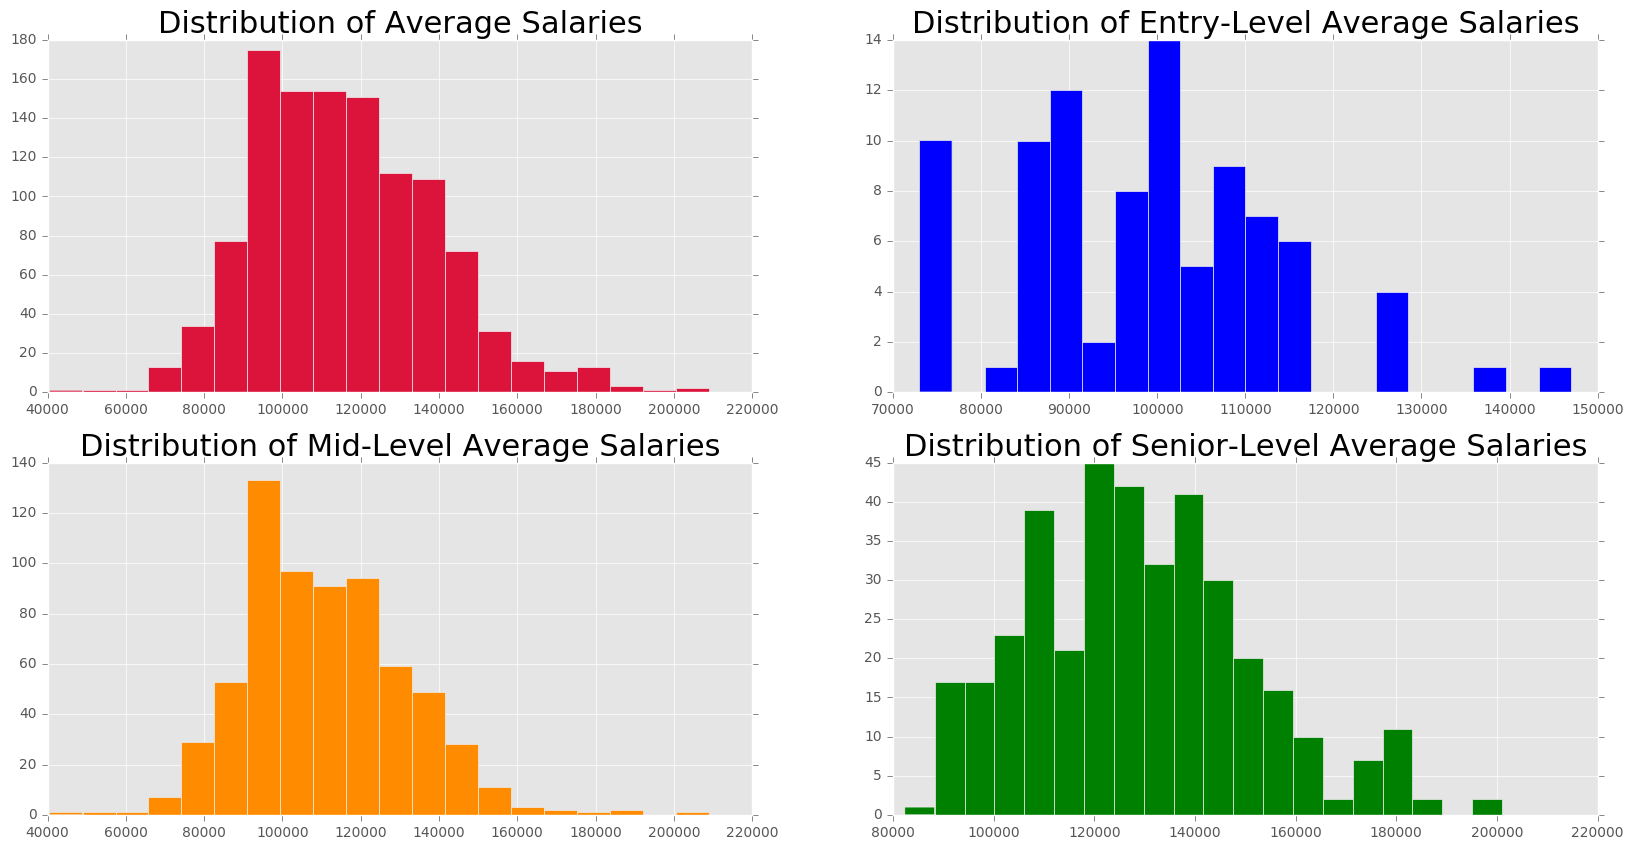

In [105]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
#Bottles Sold less than or equal to 10
axes[0][0].hist(x = gd['sal_avg'],bins = 20,color = 'crimson') 
axes[0][0].set_title('Distribution of Average Salaries',fontsize = 22)
#axes[0][0].xaxis.set_ticks(np.arange(0, 21, 2))
#axes[0][0].yaxis.set_ticks(np.arange(0, 70000, 5000))
axes[0][1].hist(x = gd[gd['entry_bin']==1]['sal_avg'],bins = 20,color = 'blue') 
axes[0][1].set_title('Distribution of Entry-Level Average Salaries',fontsize = 22)
axes[1][0].hist(x = gd[gd['mid_bin']==1]['sal_avg'],bins = 20,color = 'darkorange' )
axes[1][0].set_title('Distribution of Mid-Level Average Salaries',fontsize = 22)
axes[1][1].hist(x = gd[gd['senior_bin']==1]['sal_avg'],bins = 20,color = 'green' )
axes[1][1].set_title('Distribution of Senior-Level Average Salaries',fontsize = 22);

The histograms above are very skewed. This because there is bias due to cost of living. New York and Bay area are expensives cities to live in, thus needs to be normalized via with cost of living

#### Histograms using normalized salaries (with Cost of Living)

Normalizing the median salary by multiplying the ratio of new york COL divided by the city COL gets expected salary for New York. This allows all salaries to be compared as if it was based in New York. The data becomes more normalized than using salaries without cost of living. The entry-level histogram is skewed perhaps due to low sample size

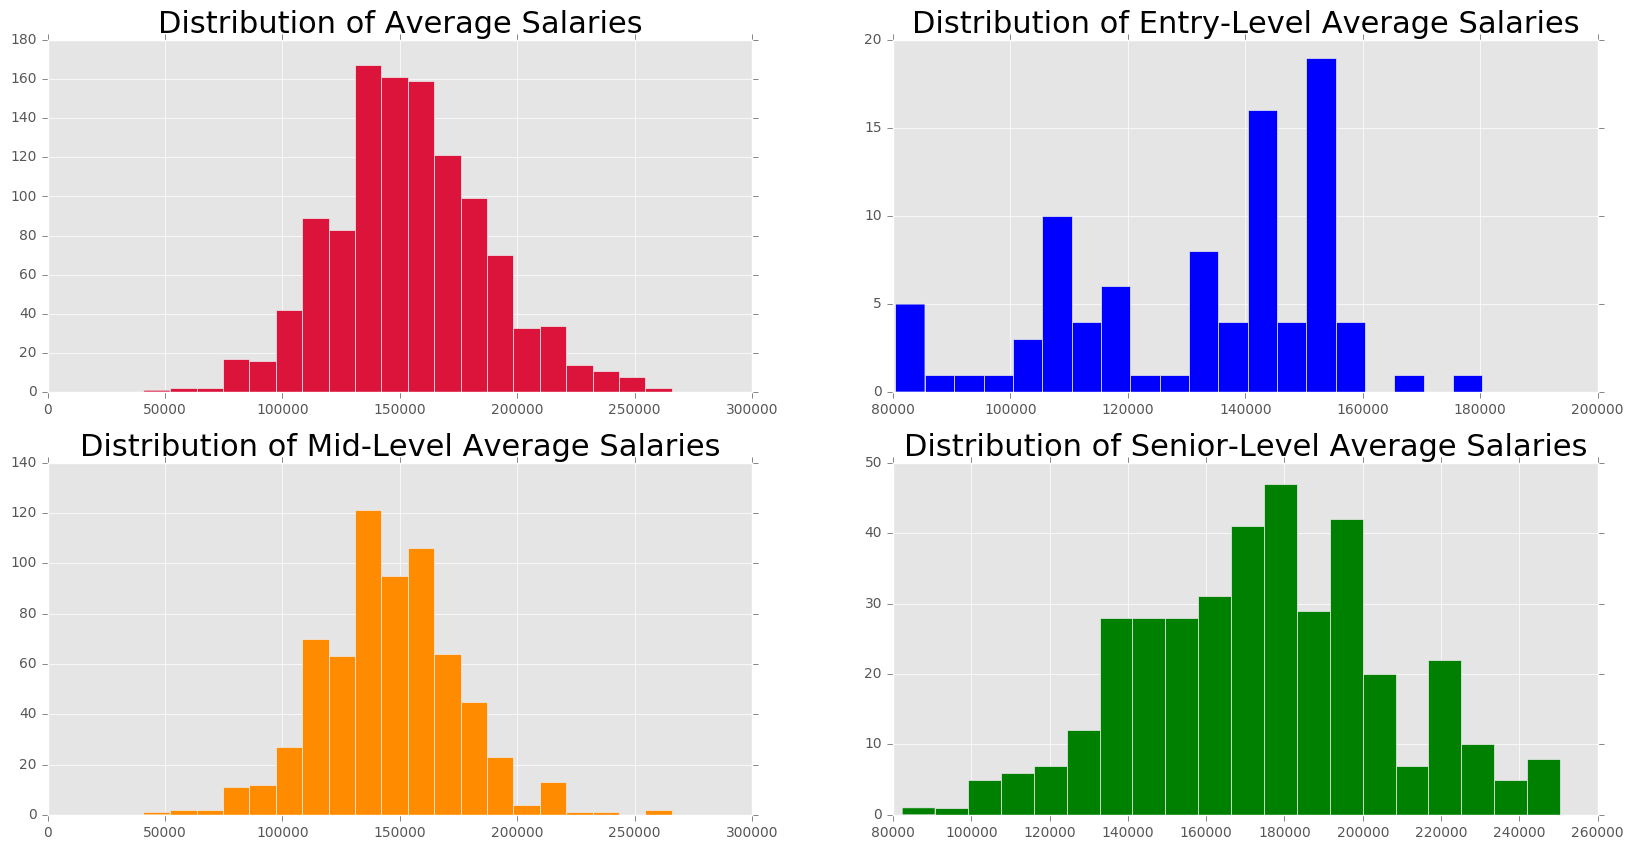

In [106]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
#Bottles Sold less than or equal to 10
axes[0][0].hist(x = gd['norm_sal'],bins = 20,color = 'crimson') 
axes[0][0].set_title('Distribution of Average Salaries',fontsize = 22)
#axes[0][0].xaxis.set_ticks(np.arange(0, 21, 2))
#axes[0][0].yaxis.set_ticks(np.arange(0, 70000, 5000))
axes[0][1].hist(x = gd[gd['entry_bin']==1]['norm_sal'],bins = 20,color = 'blue') 
axes[0][1].set_title('Distribution of Entry-Level Average Salaries',fontsize = 22)
axes[1][0].hist(x = gd[gd['mid_bin']==1]['norm_sal'],bins = 20,color = 'darkorange' )
axes[1][0].set_title('Distribution of Mid-Level Average Salaries',fontsize = 22)
axes[1][1].hist(x = gd[gd['senior_bin']==1]['norm_sal'],bins = 20,color = 'green' )
axes[1][1].set_title('Distribution of Senior-Level Average Salaries',fontsize = 22);

## Assumptions

Used Glassdoor to scrape salaries and expatistan.com to scrape cost of living

1) normalizing salaries to adjust for Cost of Living, using NYC as base

2) Used only experience, and cities as the features due not having access to skills in glassdoor

3) There will be bias due to not having access to bonus or perks

4) We could use industry to determine if there is a correlation with sector and salaries


## Regression

#### Target Variable: 
* Above_mean (1 if above mean or 0 below mean)

#### Features:
* Cities (Dummies)
* Entry-level (Dummy)
* Mid-level (Dummy)
* Senior-Level (Dummy)

In [107]:
features = gd.loc[:,['City','entry_bin','mid_bin','senior_bin']]
X = pd.get_dummies(features,columns=['City'])
y = gd['above_median']

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 77) ## create train-test out of the data given

In [110]:
# this is the code from the lab, using gridsearchCV
#need to expand on C_vals

logreg = LogisticRegression(solver='liblinear')
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
#C_vals = np.linspace(.33,.66,50)
penalties = ['l1','l2']

#using gridsearch to find best penalty and C

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train, Y_train)

print gs.best_params_
logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
#logreg = LogisticRegression(C=.55, penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, Y_train)
cv_pred = cv_model.predict(X_test)

{'penalty': 'l2', 'C': 1}


In [111]:
cv_model.coef_
#need to get coeficients into a list to bring in as a dataframe to pair up with columns


#coef_list = cv_model.coef_.tolist(

array([[-1.94518736, -0.2063331 ,  1.94390507, -0.33349045,  1.03682837,
        -1.10096848,  1.64543299,  2.78572487,  1.10345661,  0.91008606,
         0.44956776, -0.09097001, -0.20372092, -3.09840114, -1.83776437,
         0.8563294 , -0.30393   , -2.02579607]])

In [112]:
y_score = cv_model.decision_function(X_test)
conmat = np.array(confusion_matrix(Y_test, cv_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat,index=['over_mean', 'under_mean'],
                         columns=['predicted_over_mean','predicted_under_mean'])
print confusion

print classification_report(Y_test,cv_pred)
print "AUC Score is:",roc_auc_score(Y_test, y_score)

            predicted_over_mean  predicted_under_mean
over_mean                   154                    31
under_mean                   55                   134
             precision    recall  f1-score   support

          0       0.81      0.71      0.76       189
          1       0.74      0.83      0.78       185

avg / total       0.77      0.77      0.77       374

AUC Score is: 0.859016159016


In [113]:
# 133 / 188 = TP / (TP + FP)
float(conmat[0,0]) / conmat[:,0].sum()

0.7368421052631579

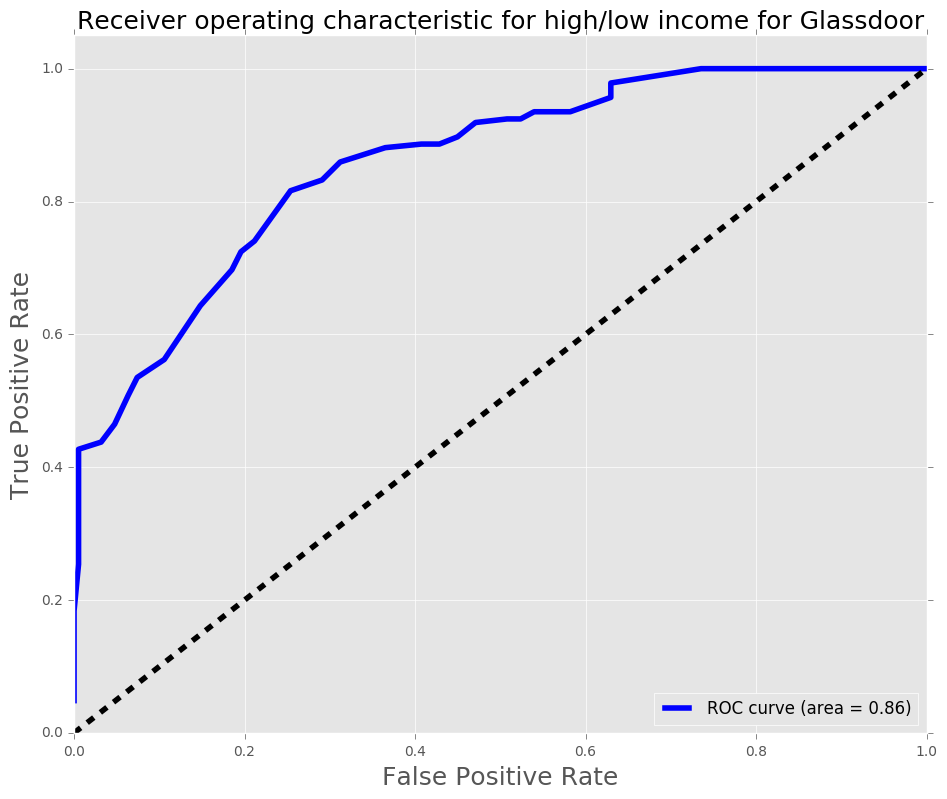

In [114]:
roc_auc_score(Y_test, y_score)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4,color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income for Glassdoor', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [116]:
coef = cv_model.coef_.reshape(18,1)
coefficients = pd.Series([x for x in coef]).to_frame().astype(float)
coefficients = coefficients.rename(columns = {0:'Coefficients'})
variables = []
for x in X.columns:
    variables.append(x)
var = pd.Series(variables).to_frame('Variables')
model_coef = pd.concat([var, coefficients],axis=1)
pct = (np.exp(model_coef['Coefficients'])-1)*100
model_coef

,Variables,Coefficients
0,entry_bin,-1.945187
1,mid_bin,-0.206333
2,senior_bin,1.943905
3,City_atlanta,-0.333490
4,City_austin,1.036828
5,City_boston,-1.100968
6,City_dallas,1.645433
7,City_detroit,2.785725
8,City_houston,1.103457
9,City_kansas city,0.910086


For glassdoor, the gridsearch resulted in penalty being L2, and C:10

#### Regression  #2  - dropping out Houston and Kansas City to test against Indeed dataframe

Dropping Houston and Kansas City. Will re-run the initial model and then predicting on indeed dataset

In [171]:
#cities we want to include
cities = ['atlanta','austin','boston','dallas','detroit','los angeles','minneapolis','nashville','new york','san francisco','san jose','seattle','washington dc']


In [172]:
#dropping houston and kc from the original glassdoor dataframe so that we can predict on indeed
gd_1 = gd[gd['City'].isin(cities)]
features_1 = gd_1.loc[:,['City','entry_bin','mid_bin','senior_bin']]
y_test = gd_1['above_median']

In [173]:
#setting the X to use to fit the new model (without Houston and Kansas City)
X_1 = pd.get_dummies(features_1,columns = ['City'])

In [174]:
#prepping the indeed dataframe to be used as a test
#cities = ['atlanta','austin','boston','dallas','detroit','houston','kanasas city','los angeles','minneapolis','nashville','san francisco','san jose','seattle','washington, dc']

master_select_cities = master_df[master_df['search_city'].isin(cities)]
master_feature = master_select_cities[master_select_cities['sal_avg'] > 0]

In [175]:
#setting the X data for indeed to be used in the test
X_indeed = master_feature.loc[:,['search_city','entry_bin','mid_bin','senior_bin']]
X_indeed = pd.get_dummies(X_indeed,columns=['search_city'])

In [176]:
#creating the binary target variable (above_mean) for the indeed test
master_feature
master_feature['norm_sal'] = master_feature['sal_avg'] * master_feature['COL_new']
master_feature['above_median'] = master_feature['norm_sal'].apply(lambda x: 1 if x > median_norm_sal else 0)
y_indeed = master_feature['above_median']

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [177]:
#creating the train/test splits
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_1, y_test, test_size = 0.33, random_state = 77) ## create train-test out of the data given

In [178]:
#performing the regression with houston and kc being dropped out
logreg = LogisticRegression(solver='liblinear')
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
#C_vals = np.linspace(.33,.66,50)
penalties = ['l1','l2']

#using gridsearch to find best penalty and C

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train1, Y_train1)

print gs.best_params_
logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
#logreg = LogisticRegression(C=.55, penalty=gs.best_params_['penalty'])
cv_model_1 = logreg.fit(X_train1, Y_train1)
cv_pred_1 = cv_model_1.predict(X_test1)

{'penalty': 'l2', 'C': 1}


In [179]:
#finding the metrics of the new model
y_score_1 = cv_model_1.decision_function(X_test1)
conmat_1 = np.array(confusion_matrix(Y_test1, cv_pred_1, labels=[1,0]))
confusion_1 = pd.DataFrame(conmat,index=['over_mean', 'under_mean'],
                         columns=['predicted_over_mean','predicted_under_mean'])
print confusion_1

print classification_report(Y_test1,cv_pred_1)
print "AUC Score is:",roc_auc_score(Y_test1, y_score_1)

            predicted_over_mean  predicted_under_mean
over_mean                   154                    31
under_mean                   55                   134
             precision    recall  f1-score   support

          0       0.81      0.81      0.81       178
          1       0.78      0.78      0.78       154

avg / total       0.80      0.80      0.80       332

AUC Score is: 0.887786370932


In [180]:
# 133 / 188 = TP / (TP + FP)
float(conmat[0,0]) / conmat[:,0].sum()

0.7368421052631579

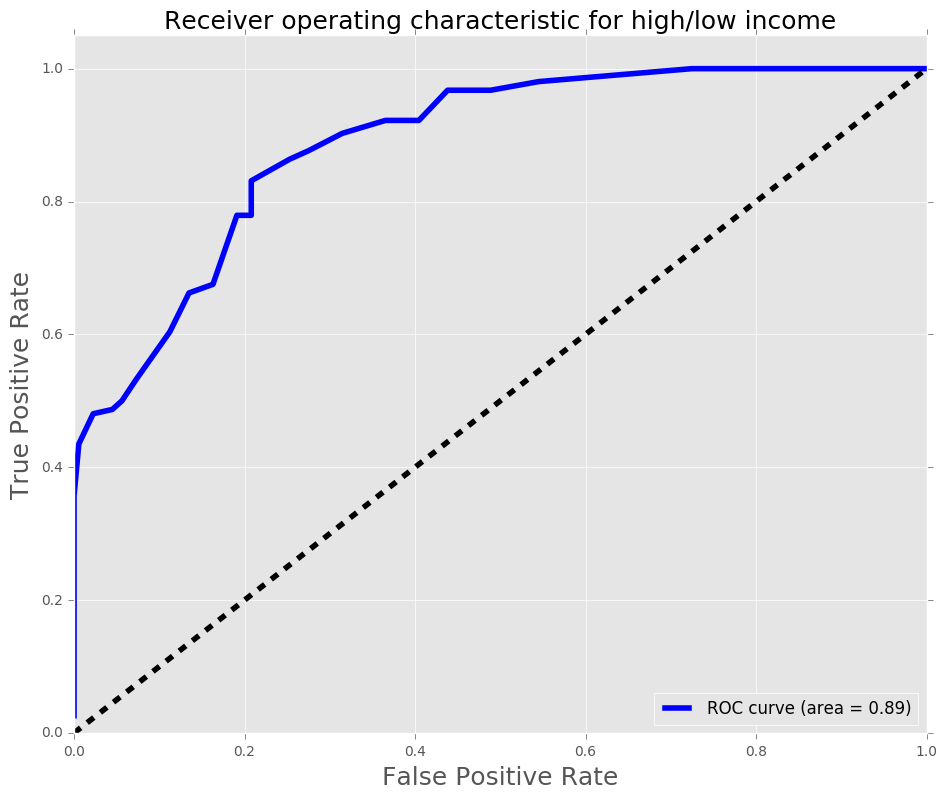

In [181]:
#plotting the AUC curve
roc_auc_score(Y_test1, y_score_1)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test1, y_score_1)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4,color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()

Dropping out Houston and KC reduced the AUC score by 0.003, which is a very marginal loss.

#### Using the model to predict on Indeed dataframe
We do not have enough data to judge accuracy of the model. Indeed has an excessive amount of missing salary data, which makes this task difficult. That being said, the AUC is .84, which is 0.03 less than the AUC for glassdoor.

In [182]:
X_indeed.shape

(96, 16)

In [183]:
cv_pred_indeed = cv_model_1.predict(X_indeed)
y_score_indeed = cv_model_1.decision_function(X_indeed)
conmat_indeed = np.array(confusion_matrix(y_indeed, cv_pred_indeed, labels=[1,0]))
confusion_indeed = pd.DataFrame(conmat_indeed,index=['over_mean', 'under_mean'],
                         columns=['predicted_over_mean','predicted_under_mean'])
print confusion_indeed

print classification_report(y_indeed,cv_pred_indeed)
print "AUC Score is:",roc_auc_score(y_indeed, y_score_indeed)

            predicted_over_mean  predicted_under_mean
over_mean                    30                    17
under_mean                    8                    41
             precision    recall  f1-score   support

          0       0.71      0.84      0.77        49
          1       0.79      0.64      0.71        47

avg / total       0.75      0.74      0.74        96

AUC Score is: 0.753799392097


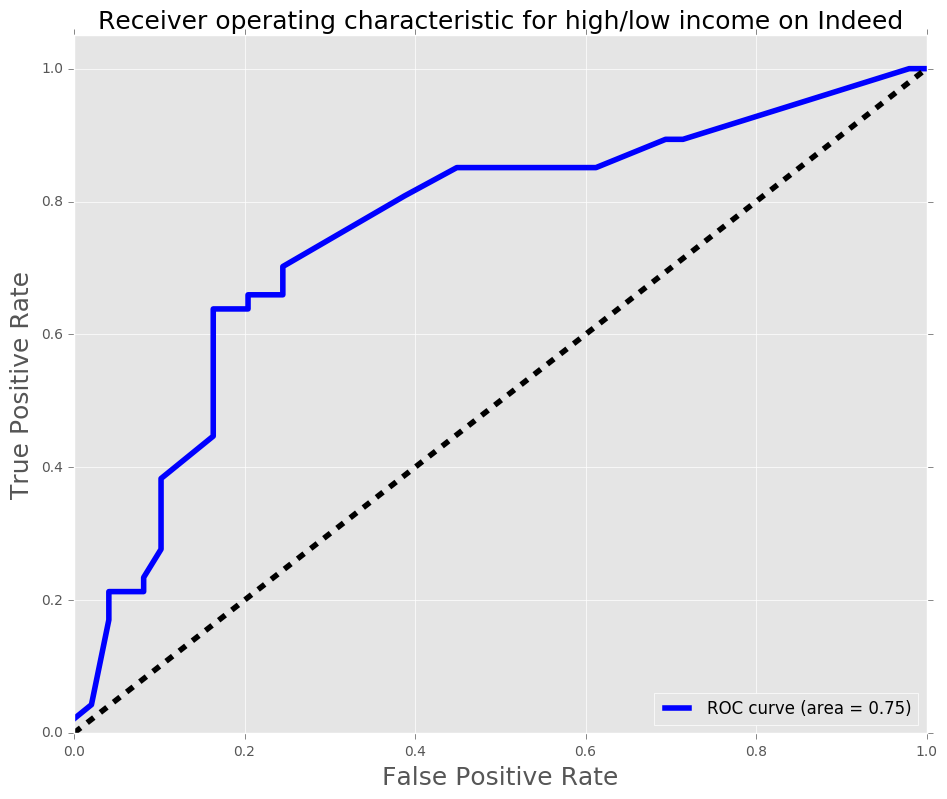

In [184]:
roc_auc_score(y_indeed, y_score_indeed)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_indeed, y_score_indeed)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4,color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income on Indeed', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### Conclusion